# 最小二乘法
#### 最小二乘法概念
    最小二乘法（又称最小平方法）是一种数学优化技术。它通过最小化误差的平方和寻找数据的最佳函数匹配。利用最小二乘法可以简便地求得未知的数据，并使得这些求得的数据与实际数据之间误差的平方和为最小.
    
#### 公式推导
给定函数 y=f(x),采集n个数据点$(x_{1},y_{1}),....,(x_{n},y_{n})$

求k阶多项式 $p(x)=a_{0}+a_{1}*x+a_{2}*x^2+...+a_{k}*x^k$,使得

$min=\sum_{i=1}^n (p(x_{i})-y_{i})^2=\sum_{i=1}^n (a_{0}+a_{1}*x_{i}+a_{2}*x_{i}^2+...+a_{k}*x_{i}^k-y_{i})^2$

对$a_{i}$求偏导，得k+1个等式

$2\sum_{i=1}^n [(a_{0}+a_{1}*x_{i}+a_{2}*x_{i}^2+...+a_{k}*x_{i}^k-y_{i})]=0$

$2\sum_{i=1}^n [(a_{0}+a_{1}*x_{i}+a_{2}*x_{i}^2+...+a_{k}*x_{i}^k-y_{i})x_{i}]=0$

$2\sum_{i=1}^n [(a_{0}+a_{1}*x_{i}+a_{2}*x_{i}^2+...+a_{k}*x_{i}^k-y_{i})x_{i}^2]=0$

......

$2\sum_{i=1}^n [(a_{0}+a_{1}*x_{i}+a_{2}*x_{i}^2+...+a_{k}*x_{i}^k-y_{i})x_{i}^k]=0$

整理，得：

$a_{0}\sum_{i=1}^nx_{i}^0+a_{1}\sum_{i=1}^nx_{i}^1+a_{2}\sum_{i=1}^nx_{i}^2+...+a_{k}\sum_{i=1}^nx_{i}^k=\sum_{i=1}^nx_{i}^0y_{i}$

$a_{0}\sum_{i=1}^nx_{i}^1+a_{1}\sum_{i=1}^nx_{i}^2+a_{2}\sum_{i=1}^nx_{i}^3+...+a_{k}\sum_{i=1}^nx_{i}^k=\sum_{i=1}^nx_{i}^1y_{i}$

$a_{0}\sum_{i=1}^nx_{i}^2+a_{1}\sum_{i=1}^nx_{i}^3+a_{2}\sum_{i=1}^nx_{i}^4+...+a_{k}\sum_{i=1}^nx_{i}^k=\sum_{i=1}^nx_{i}^2y_{i}$

......

$a_{0}\sum_{i=1}^nx_{i}^k+a_{1}\sum_{i=1}^nx_{i}^{k+1}+a_{2}\sum_{i=1}^nx_{i}^{k+2}+...+a_{k}\sum_{i=1}^nx_{i}^2k=\sum_{i=1}^nx_{i}^ky_{i}$

以矩阵表示为：

$
\left[ \begin{array}{cccc}
\sum_i{i=1}^nx_{i}^0 & \sum_{i=1}^nx_{i}^1 & \ldots & \sum_{i=1}^nx_{i}^k\\
\sum_i{i=1}^nx_{i}^1 & \sum_{i=1}^nx_{i}^2 & \ldots & \sum_{i=1}^nx_{i}^{k+1}\\
\vdots & \vdots & \ddots & \vdots\\
\sum_i{i=1}^nx_{i}^k & \sum_{i=1}^nx_{i}^{k+1} & \ldots & \sum_{i=1}^nx_{i}^{2k}\\
\end{array} \right]
\left[ \begin{array}{cccc}
a_{0}\\
a_{1}\\
\vdots\\
a_{k}\\
\end{array} \right]
=
\left[ \begin{array}{cccc}
\sum_{i=1}^nx_{i}^0y_{i}\\
\sum_{i=1}^nx_{i}^1y_{i}\\
\vdots\\
\sum_{i=1}^nx_{i}^ky_{i}\\
\end{array} \right]
$

解线性方程

len(x) 100
len(y): 100


Text(0.5, 1.0, 'samples')

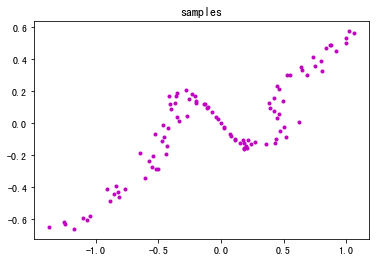

In [38]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import random 

#多项式阶数
order=100
#生成曲线上的各个点 
x = np.arange(-1,1,0.02) 
y = [((a*a-1)*(a*a-1)*(a*a-1)+0.5)*np.sin(a*2) for a in x] 
# 生成的曲线上的各个点偏移一下，并放入到xa,ya中去 
i = 0 
xa = [] 
ya = [] 
for xx in x: 
    yy = y[i] 
    d = float(random.randint(60, 140)) / 100 
    i += 1 
    xa.append(xx * d) 
    ya.append(yy * d)
print('len(x)',len(x))
print('len(y):',len(y))
plt.plot(xa, ya, color='m', linestyle='', marker='.') 
plt.title('samples')

In [39]:
#求出等式左边的矩阵A 
matA=[] 
for i in range(0,order+1): 
    mat=[] 
    for j in range(0+i,order+1+i): 
        sumA=0 
        for xx in xa: 
            sumA=sumA+xx**j 
        mat.append(sumA) 
    matA.append(mat) 
A=np.array(matA) 
print('A.shape:',A.shape)

A.shape: (101, 101)


In [40]:
# 求出右边的等式B 
matB=[] 
for j in range(0,order+1): 
    sumB=0 
    for xx,yy in zip(xa,ya): 
        sumB=sumB+xx**j*yy 
    matB.append(sumB) 
B=np.array(matB) 
print('B.shape:',B.shape)

B.shape: (101,)


In [41]:
# 解线性方程 A*a=B
a=np.linalg.solve(A,B)
print(a)

[ 2.38770587e-02 -1.04615131e+00 -3.54959685e+00  9.51050723e+00
  9.67283029e+01 -1.60259154e+01 -8.54006097e+02 -4.36586258e+01
  3.38419435e+03  1.30098865e+02 -6.77991766e+03  7.49022891e+02
  7.39266388e+03 -4.24802042e+03 -6.27353017e+03  7.86940737e+03
  7.26382828e+03 -4.99604666e+03 -5.07978826e+03 -2.06860705e+03
 -1.31388493e+03  3.56669457e+03  1.38745245e+03 -8.33418525e+02
  2.33624798e+03  1.87812460e+02 -1.17132366e+03 -2.24928472e+02
 -5.79988154e+02 -2.14481208e+02  8.34676214e+01  7.86049118e+01
  7.63385624e+01  7.80294268e+01  9.97983666e+00 -1.45526787e+01
  2.11855244e+01 -2.00423614e+01  9.28425678e+00  1.35921953e+01
 -4.51917918e+00 -1.82291006e+00 -6.22278799e-01 -1.06456511e+00
  6.89789490e-01  4.23665184e-01 -1.21631093e+00  8.87481314e-01
  1.19652268e-01  5.13766884e-01  8.34543503e-02 -3.10744175e-01
 -1.07058457e-02  2.57455542e-02  2.85165805e-02 -6.91212958e-02
  3.37725106e-02  4.74448113e-03 -5.43741250e-04  1.38940098e-03
  4.64992269e-03  4.08148

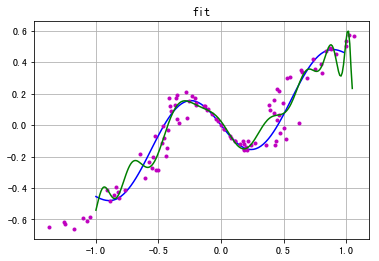

In [51]:
# 曲线拟合
def fun_solve(x,a): 
    y=0 
    for i in range(len(a)): 
        y+=a[i]*x**i 
    return y 

xxa= np.arange(-1,1.06,0.01) 
yya=[]
for xxaa in xxa: 
    yya.append(fun_solve(xxaa,a)) 

plt.plot(x, y, color='b')     
plt.plot(xa, ya, color='m', linestyle='', marker='.') 
plt.plot(xxa,yya,color='g',linestyle='-',marker='')
plt.title('fit')
plt.grid()